# NLP Excercise

In [2]:
#Install NLTK
!pip install -U nltk

  Running setup.py bdist_wheel for nltk: started
  Running setup.py bdist_wheel for nltk: finished with status 'done'
  Stored in directory: C:\Users\jillm\AppData\Local\pip\Cache\wheels\41\c8\31\48ace4468e236e0e8435f30d33e43df48594e4d53e367cf061
Successfully built nltk
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


  Ignoring singledispatch: markers 'python_version < "3.4"' don't match your environment
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
import nltk
import pandas as pd
import numpy as np

#download nltk data
nltk.download("stopwords", "pos_tag", "tokenize")

from nltk.corpus import stopwords

In [8]:
dir(nltk) #useful  pos_tag (tagging), tokenize (split sentence into word)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [9]:
#examples of stopwords - words used frequentyly but do not contribute to the meaning, sentiment neutral, usually dropped
stopwords.words('english')[0:500:50]

['i', 'does', 'any', 'weren']

In [10]:
#reading in text
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)

len(raw)

raw[:75]


'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [11]:
#reading and print spam data
spamData=open("D:/data_science/NLP/SMSSpamCollection").read()

spamData[0:500] #no structure

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [15]:
#replace backslash \t tag (means tab limited text)
parsedData=spamData.replace('\t','\n').split('\n')
parsedData[0:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

In [17]:
#pull ever nth word
labelList=parsedData[0::2]
textList=parsedData[1::2]
print(labelList[0:5])
print(textList[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


In [21]:
print(len(labelList))
print(len(textList))
print(labelList[-5:])

5575
5574
['ham', 'ham', 'ham', 'ham', '']


In [22]:
#combine label and text list for analysis to structure the data
fullCorpus=pd.DataFrame({
    'label':labelList [:-1],
    'body_list':textList
})
print(fullCorpus[0:5])

                                           body_list label
0  Go until jurong point, crazy.. Available only ...   ham
1                      Ok lar... Joking wif u oni...   ham
2  Free entry in 2 a wkly comp to win FA Cup fina...  spam
3  U dun say so early hor... U c already then say...   ham
4  Nah I don't think he goes to usf, he lives aro...   ham


In [28]:
dataset=pd.read_csv("D:/data_science/NLP/SMSSpamCollection", sep='\t', header=None)
print(dataset[0:5])

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [35]:
#explore data
fullCorpus.columns=[ 'body_text','label']
fullCorpus.head

<bound method NDFrame.head of                                               body_text label
0     Go until jurong point, crazy.. Available only ...   ham
1                         Ok lar... Joking wif u oni...   ham
2     Free entry in 2 a wkly comp to win FA Cup fina...  spam
3     U dun say so early hor... U c already then say...   ham
4     Nah I don't think he goes to usf, he lives aro...   ham
5     FreeMsg Hey there darling it's been 3 week's n...  spam
6     Even my brother is not like to speak with me. ...   ham
7     As per your request 'Melle Melle (Oru Minnamin...   ham
8     WINNER!! As a valued network customer you have...  spam
9     Had your mobile 11 months or more? U R entitle...  spam
10    I'm gonna be home soon and i don't want to tal...   ham
11    SIX chances to win CASH! From 100 to 20,000 po...  spam
12    URGENT! You have won a 1 week FREE membership ...  spam
13    I've been searching for the right words to tha...   ham
14                  I HAVE A DATE ON SUN

In [39]:
#shape 
print("Input data has {} rows and {}columns".format(len(fullCorpus), len(fullCorpus.columns)))

#count data by labels
print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus), 
                                                     len(fullCorpus[fullCorpus['label']=='spam']),
                                                     len(fullCorpus[fullCorpus['label']=='ham'])))

#missing data
print("Number of nulls in label: {}".format(fullCorpus['label'].isnull().sum()))
print("Number of nulls in body_text: {}".format(fullCorpus['body_text'].isnull().sum()))

Input data has 5574 rows and 2columns
Out of 5574 rows, 747 are spam, 4827 are ham
Number of nulls in label: 0
Number of nulls in body_text: 0


In [40]:
#regular expressions - regex - describe certain search patterns. E.g. 'app' string in a text, or
#'[a-m]' all string charaters in range, or '[a-m]+' string longer than one character
#'[0-9]+' all numericals more than one number
#'[a-m0-9]+ - will search for combinatino of characters and numbers

import re
re_test ='There are so many words spoken every day, it could fill the Earth 5 times if they were solid'
re_test_messy = 'There are so many words     spoken every day, it could fill the Earth 5    times if they were solid'
re_test_messy1 ='There**are/upstrin\so many words spoken every day, >>>> it could fill ****the Earth 5 times if they were solid'

In [41]:
#split a sentence into a list of words
re.split('\s', re_test) # look for single white space

['There',
 'are',
 'so',
 'many',
 'words',
 'spoken',
 'every',
 'day,',
 'it',
 'could',
 'fill',
 'the',
 'Earth',
 '5',
 'times',
 'if',
 'they',
 'were',
 'solid']

In [45]:
re.split('\s+', re_test_messy)

['There',
 'are',
 'so',
 'many',
 'words',
 'spoken',
 'every',
 'day,',
 'it',
 'could',
 'fill',
 'the',
 'Earth',
 '5',
 'times',
 'if',
 'they',
 'were',
 'solid']

In [47]:
re.split('\W+', re_test_messy1) #handling special characters

['There',
 'are',
 'upstring',
 'so',
 'many',
 'words',
 'spoken',
 'every',
 'day',
 'it',
 'could',
 'fill',
 'the',
 'Earth',
 '5',
 'times',
 'if',
 'they',
 'were',
 'solid']

In [50]:
re.findall('\w+', re_test_messy1) #lower case w - search for words, upper case W - for special characters

['There',
 'are',
 'upstring',
 'so',
 'many',
 'words',
 'spoken',
 'every',
 'day',
 'it',
 'could',
 'fill',
 'the',
 'Earth',
 '5',
 'times',
 'if',
 'they',
 'were',
 'solid']

In [58]:
#replace specific strings
test='I want to exercise today using HIIT2'
test1='I want to exercise today using HIPT2'
test2='I want to exercise today using HIIT1'

In [52]:
re.findall('[a-z]+', test)

['want', 'to', 'exercise', 'today', 'using']

In [53]:
re.findall('[A-Z]+', test)

['I', 'HIIT']

In [59]:
re.findall('[A-Z]+[0-9]+', test1) #search for letters AND numbers

['HIPT2']

In [61]:
#replace tokenz
re.sub('[A-Z]+[0-9]+','HIIT2', test2)

'I want to exercise today using HIIT2'

In [ ]:
#other examples
re.search()
re.match()
re.fullmatch()
re.finditer()
re.escape()

In [70]:
#MACHINE LEARNING PIPELINE
#1.data cleaning
#1.1 Remove punctuation
pd.set_option('display.max_colwidth', 100) #custom value for number of characters to be seen in a column, default 50
print(fullCorpus[0:5])

import string
print(string.punctuation)

#list comprehension 
def remove_punct(text):
    text_nopunct= ''.join([char for char in text if char not in string.punctuation]) #join on nothing
    return text_nopunct
    
fullCorpus['body_text_clean']=fullCorpus['body_text'].apply(lambda x: remove_punct(x))

fullCorpus.head()

                                                                                             body_text  \
0  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...   
1                                                                        Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
3                                                    U dun say so early hor... U c already then say...   
4                                        Nah I don't think he goes to usf, he lives around here though   

  label  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                       body_text_clean  
0  [G, o,  , u, n, t, i, l,  , j, u, r, o, n, g,  , p, o, i, n, t,  , c, r, a, z, y,  , A, v, a, i,...  
1                                [O, k,  , l, a, r,  , J, o, k, i, n, g,  , w, i, f,  

,body_text,label,body_text_clean
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say
4,"Nah I don't think he goes to usf, he lives around here though",ham,Nah I dont think he goes to usf he lives around here though


In [71]:
#1.2 Tokenization
import re

def tokenize(text):
    tokens=re.split('\W+', text)
    return tokens

fullCorpus['body_text_tokenized']=fullCorpus['body_text_clean'].apply(lambda x: tokenize(x.lower()))
print(fullCorpus[0:5])

                                                                                             body_text  \
0  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...   
1                                                                        Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
3                                                    U dun say so early hor... U c already then say...   
4                                        Nah I don't think he goes to usf, he lives around here though   

  label  \
0   ham   
1   ham   
2  spam   
3   ham   
4   ham   

                                                                                       body_text_clean  \
0  Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...   
1                                                                              Ok la

In [78]:
#1.3 Remove stopwords
import nltk

stopword=nltk.corpus.stopwords.words('english')
print(stopword[0:500:50])

['i', 'does', 'any', 'weren']


In [75]:
pd.set_option('display.max_colwidth', 50)

def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopword]
    return text

fullCorpus['body_text_nostop']=fullCorpus['body_text_tokenized'].apply(lambda x:remove_stopwords(x))
fullCorpus.head

<bound method NDFrame.head of                                               body_text label  \
0     Go until jurong point, crazy.. Available only ...   ham   
1                         Ok lar... Joking wif u oni...   ham   
2     Free entry in 2 a wkly comp to win FA Cup fina...  spam   
3     U dun say so early hor... U c already then say...   ham   
4     Nah I don't think he goes to usf, he lives aro...   ham   
5     FreeMsg Hey there darling it's been 3 week's n...  spam   
6     Even my brother is not like to speak with me. ...   ham   
7     As per your request 'Melle Melle (Oru Minnamin...   ham   
8     WINNER!! As a valued network customer you have...  spam   
9     Had your mobile 11 months or more? U R entitle...  spam   
10    I'm gonna be home soon and i don't want to tal...   ham   
11    SIX chances to win CASH! From 100 to 20,000 po...  spam   
12    URGENT! You have won a 1 week FREE membership ...  spam   
13    I've been searching for the right words to tha...   ha

In [79]:
#2 Data Cleaning
#2.1 Stemming
ps=nltk.PorterStemmer()

In [80]:
dir(ps) #stem method most commonly used

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [84]:
print(ps.stem('stand'))
print(ps.stem('standing'))
print(ps.stem('stood'))

stand
stand
stood


In [82]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


In [85]:
pd.set_option('display.max_colwidth', 100)
stopwords=nltk.corpus.stopwords.words('english')

In [90]:
def clean_text(text):
    text=''.join([word for word in text if word not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[word for word in tokens if word not in stopwords]
    return text

fullCorpus['body_text_nostop']=fullCorpus['body_text'].apply(lambda x: clean_text(x.lower()))
fullCorpus.head()

,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives around here though",ham,Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


In [92]:
#stem text
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

fullCorpus['body_text_stemmed']=fullCorpus['body_text_nostop'].apply(lambda x: stemming(x))

fullCorpus.head()

,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives around here though",ham,Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


In [94]:
#lemmitizing
wn=nltk.WordNetLemmatizer() #the most popular words grouped into distinct concepts www.wordnet
ps=nltk.PorterStemmer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [95]:
print(ps.stem('meanness'))
print(ps.stem('meanning'))

print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

mean
mean
meanness
meaning


In [97]:
print(ps.stem('goose'))
print(ps.stem('geese'))

print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goos
gees
goose
goose


In [100]:
pd.set_option('display.max_colwidth', 100)
stopwords=nltk.corpus.stopwords.words('english')

def clean_text(text):
    text=''.join([word for word in text if word not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[word for word in tokens if word not in stopwords]
    return text

fullCorpus['body_text_nostop']=fullCorpus['body_text'].apply(lambda x: clean_text(x.lower()))
fullCorpus.head()


,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives around here though",ham,Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


In [104]:
def lemmatising(tokenised_text):
    text=[wn.lemmatize(word) for word in tokenised_text]
    return text

fullCorpus['body_text_lemmatized']=fullCorpus['body_text_nostop'].apply(lambda x: lemmatising(x))
fullCorpus.head()

,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives around here though",ham,Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


In [107]:
#Vectorising
def clean_text(text):
    text=''.join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(analyzer=clean_text)

X_counts=count_vect.fit_transform(fullCorpus['body_text'])
print(X_counts.shape)
print(count_vect.get_feature_names()) #numbers could be removed

(5574, 8153)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [108]:
sample=fullCorpus[0:20]
count_vect_sample=CountVectorizer(analyzer=clean_text)
x_count_sample=count_vect_sample.fit_transform(sample['body_text'])
print(x_count_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 223)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtãº120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'alreadi', 'amor', 'anymor', 'appli', 'around', 'avail', 'b', 'back', 'bless', 'breather', 'brother', 'buffet', 'bugi', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copi', 'cost', 'crazi', 'credit', 'cri', 'csh11', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'e', 'earli', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'goe', 'gonna', 'got', 'gota', 'grant', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joke', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 'lccltd', 'like', 'link'

In [110]:
#vectorizers output sparse matrices
#a matrix in which most entries are 0, in the interest of efficient storage
#a sparse matrix will be shrored by only storing the locations of the non-zero elements
x_count_sample

<20x223 sparse matrix of type '<class 'numpy.int64'>'
	with 252 stored elements in Compressed Sparse Row format>

In [111]:
x_count_df=pd.DataFrame(x_count_sample.toarray())
x_count_df

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
x_count_df.columns=count_vect_sample.get_feature_names()
x_count_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,â
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
#N-gram vectorizing. Need to tune n-value - optimise
#for N-gram need to join the text into strings after cleaning
def clean_text(text):
    text=''.join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=' '.join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

fullCorpus['cleaned_text']=fullCorpus['body_text'].apply(lambda x:clean_text(x))
fullCorpus.head()

,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,cleaned_text
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives around here though",ham,Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though


In [120]:
ngram_vect=CountVectorizer(ngram_range=(1,2)) #last digit 2 unigrams and bigrams, last digit 3 then unigram, bi and trigram 
x_count=ngram_vect.fit_transform(fullCorpus['cleaned_text'])
print(x_count.shape)
print(ngram_vect.get_feature_names())

(5574, 39618)
['008704050406', '008704050406 sp', '0089mi', '0089mi last', '0121', '0121 2025050', '01223585236', '01223585236 xx', '01223585334', '01223585334 cum', '0125698789', '0125698789 ring', '02', '02 user', '020603', '020603 2nd', '0207', '0207 153', '02070836089', '02072069400', '02072069400 bx', '02073162414', '02073162414 cost', '02085076972', '02085076972 repli', '020903', '020903 2nd', '021', '021 3680', '021 3680offer', '050703', '050703 tcsbcm4235wc1n3xx', '0578', '06', '06 good', '060505', '061104', '07008009200', '07046744435', '07046744435 arrang', '07090201529', '07090298926', '07090298926 reschedul', '07099833605', '07099833605 reschedul', '071104', '07123456789', '07123456789 87077', '0721072', '0721072 find', '07732584351', '07732584351 rodger', '07734396839', '07734396839 ibh', '07742676969', '07742676969 show', '07753741225', '07753741225 show', '0776xxxxxxx', '0776xxxxxxx uve', '07786200117', '077xxx', '077xxx 2000', '078', '07801543489', '07801543489 guarante

In [123]:
sample=fullCorpus[0:10]
x_count_sample=ngram_vect.fit_transform(sample['cleaned_text'])
print(x_count_sample.shape)
print(ngram_vect.get_feature_names())

(10, 235)
['08002986030', '08452810075over18', '09061701461', '09061701461 claim', '11', '11 month', '12', '12 hour', '150', '150 rcv', '2005', '2005 text', '21st', '21st may', '87121', '87121 receiv', '900', '900 prize', 'aid', 'aid patent', 'alreadi', 'alreadi say', 'amor', 'amor wat', 'appli', 'appli 08452810075over18', 'around', 'around though', 'avail', 'avail bugi', 'back', 'back id', 'brother', 'brother like', 'buffet', 'buffet cine', 'bugi', 'bugi great', 'call', 'call 09061701461', 'call mobil', 'caller', 'caller press', 'callertun', 'callertun caller', 'camera', 'camera free', 'chg', 'chg send', 'cine', 'cine got', 'claim', 'claim call', 'claim code', 'co', 'co free', 'code', 'code kl341', 'colour', 'colour mobil', 'comp', 'comp win', 'copi', 'copi friend', 'crazi', 'crazi avail', 'cup', 'cup final', 'custom', 'custom select', 'darl', 'darl week', 'dont', 'dont think', 'dun', 'dun say', 'earli', 'earli hor', 'entitl', 'entitl updat', 'entri', 'entri questionstd', 'entri wkli'

In [125]:
#convert to DF
x_count_df_sample=pd.DataFrame(x_count_sample.toarray())
x_count_df_sample.columns=ngram_vect.get_feature_names()
x_count_df_sample.head()

,08002986030,08452810075over18,09061701461,09061701461 claim,11,11 month,12,12 hour,150,150 rcv,...,winner,winner valu,wkli,wkli comp,word,word back,world,world la,xxx,xxx std
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
#Inverse Document Frequency Weighting
def clean_text(text):
    text=''.join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+', text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(fullCorpus['body_text'])
print(x_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5574, 8153)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [130]:
sample=fullCorpus[0:20]
tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
x_tfidf_sample=tfidf_vect_sample.fit_transform(sample['body_text'])
print(x_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 223)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtãº120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'alreadi', 'amor', 'anymor', 'appli', 'around', 'avail', 'b', 'back', 'bless', 'breather', 'brother', 'buffet', 'bugi', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copi', 'cost', 'crazi', 'credit', 'cri', 'csh11', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'e', 'earli', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'goe', 'gonna', 'got', 'gota', 'grant', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joke', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 'lccltd', 'like', 'link'

In [132]:
#create a data frame
x_tfidf_df=pd.DataFrame(x_tfidf_sample.toarray())
x_tfidf_df.columns=tfidf_vect_sample.get_feature_names()
x_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,â
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.25,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.0000,0.198423,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.23345,0.000000,...,0.000000,0.000000,0.185167,0.00,0.000000,0.23345,0.000000,0.000000,0.000000,0.185167
6,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.0000,0.000000,0.227832,0.000000,0.000000,0.000000,0.0000,0.227832,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.180710
9,0.1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.1971,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [133]:
#Feature Engineering
#Feature creation
#text message length
fullCorpus['body_len']=fullCorpus['body_text'].apply(lambda x: len(x)-x.count(' '))
fullCorpus[0:5]

,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,cleaned_text,body_len
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat,92
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,24
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,39
4,"Nah I don't think he goes to usf, he lives around here though",ham,Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49


In [135]:
#% of text that is punctuation
import string
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(' ')),3)*100

fullCorpus['punct%']=fullCorpus['body_text'].apply(lambda x: count_punct(x))
fullCorpus.head()


,body_text,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,cleaned_text,body_len,punct%
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",ham,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat,92,9.8
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,24,25.0
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128,4.7
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,39,15.4
4,"Nah I don't think he goes to usf, he lives around here though",ham,Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49,4.1


In [136]:
#Evaluate feature
from matplotlib import pyplot
%matplotlib inline

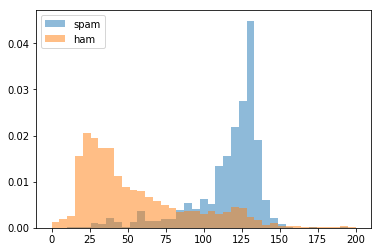

In [138]:
bins=np.linspace(0,200,40)

pyplot.hist(fullCorpus[fullCorpus['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(fullCorpus[fullCorpus['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')

pyplot.legend(loc='upper left')
pyplot.show()

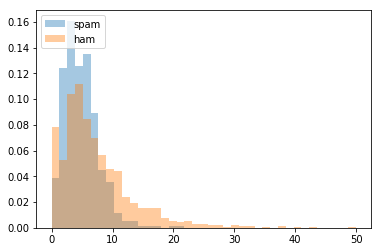

In [143]:
bins=np.linspace(0,50,40)

pyplot.hist(fullCorpus[fullCorpus['label']=='spam']['punct%'], bins, alpha=0.4, normed=True, label='spam')
pyplot.hist(fullCorpus[fullCorpus['label']=='ham']['punct%'], bins, alpha=0.4, normed=True, label='ham')

pyplot.legend(loc='upper left')
pyplot.show()

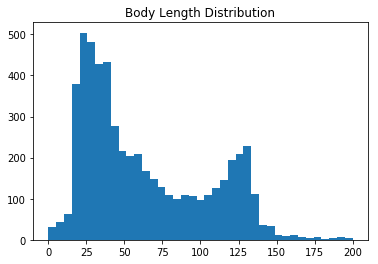

In [147]:
#identifying features for transformation
#see full distribution
#examine for tail or outliers

bins=np.linspace(0,200,40)
pyplot.hist(fullCorpus['body_len'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()


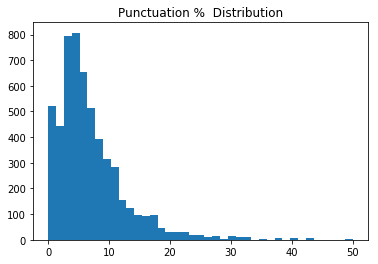

In [148]:
bins=np.linspace(0,50,40)
pyplot.hist(fullCorpus['punct%'], bins)
pyplot.title('Punctuation %  Distribution')
pyplot.show()


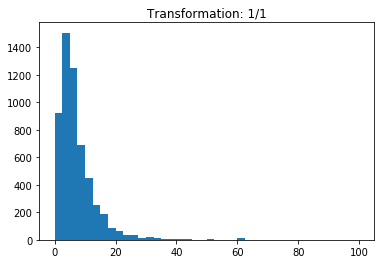

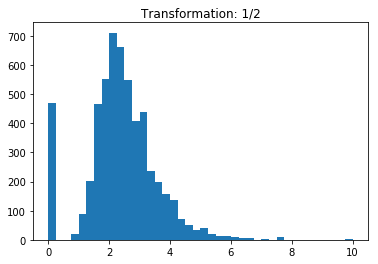

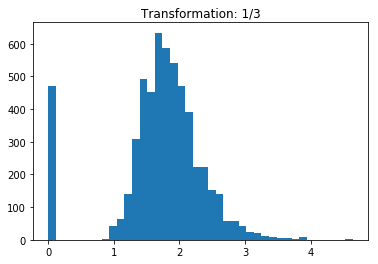

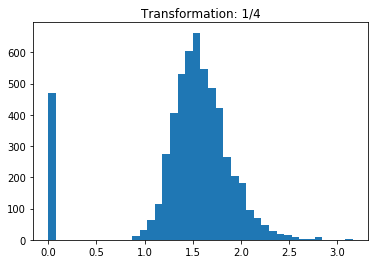

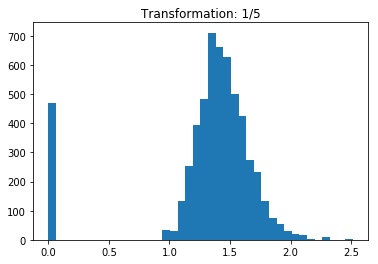

In [150]:
#Box cox Power transformation y in the power of x, where x can be positive negative integer, or square root =0.5, x=0 ->log(y)

for i in [1,2,3,4,5]:
    pyplot.hist((fullCorpus['punct%'])**(1/i), bins=40)
    pyplot.title('Transformation: 1/{}'.format(str(i)))
    pyplot.show()
    


In [155]:
#Machine Learning
#Builiding random forest model
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

data=fullCorpus[['label', 'body_text']]

def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(' ')),3)*100

data['body_len']=data['body_text'].apply(lambda x: len(x) - x.count(' '))
data['punct%']=data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text=''.join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(data['body_text'])

x_features=pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)
x_features.head()

c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,body_len,punct%,0,1,2,3,4,5,6,7,...,8143,8144,8145,8146,8147,8148,8149,8150,8151,8152
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
#explore random forest classifier attributes and hyperparameters
from sklearn.ensemble import RandomForestClassifier
print(dir(RandomForestClassifier))
print(RandomForestClassifier()) #'feature_importances_', 'fit' ,'predict'

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,

In [158]:
#explore randomforestclassifier through cross-validation
from sklearn.model_selection import KFold, cross_val_score

In [160]:
rf=RandomForestClassifier(n_jobs=-1) #runs faster building trees in parallel
k_fold=KFold(n_splits=5)
cross_val_score(rf, x_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)


array([ 0.96412556,  0.97219731,  0.97488789,  0.96412556,  0.96947935])

In [161]:
#random forest with holdout set
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [162]:
x_train, x_test, y_train, y_test=train_test_split(x_features, data['label'], test_size=0.25)

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model=rf.fit(x_train, y_train)

In [165]:
#feature importances
sorted(zip(rf_model.feature_importances_, x_train.columns), reverse=True)[0:10] #combines two arrays

[(0.061037911149762397, 8145),
 (0.039680252245719423, 2041),
 (0.031377621763789547, 3151),
 (0.027903950621942942, 1811),
 (0.027461099556602232, 7388),
 (0.026964172393897052, 'body_len'),
 (0.023482213851874947, 4825),
 (0.018839975961886059, 6319),
 (0.015979969917983578, 5755),
 (0.015281149312973381, 7064)]

In [166]:
y_pred=rf_model.predict(x_test)
precision, recall, fscore, support=score(y_test, y_pred, pos_label='spam', average='binary')

In [168]:
print('Precision:{} / Recall: {} / Accuracy:{}'.format(round(precision,3), \
                                                       round(recall,3), \
                                                    round((y_pred==y_test).sum()/len(y_pred),3)))
#precision all spam identified as spam is spam
#53% of spam that came was properly placed into spam
#93% of emails were correctly identified as spam or ham

Precision:1.0 / Recall: 0.53 / Accuracy:0.938


In [172]:
#random forest with grid search
#build own grid search
def train_RF(n_est, depth):
    rf=RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model=rf.fit(x_train, y_train)
    y_pred=rf_model.predict(x_test)
    precision, recall, fscore, support=score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est:{} / Depth:{} =====Precision:{} / Recall: {} / Accuracy: {}'.format \
         (n_est, depth, round(precision, 3), round(recall,3),
         round((y_pred==y_test).sum()/len(y_pred),3)))

In [173]:
for n_est in [10,50,100]:
    for depth in [10,20,30, None]:
        train_RF(n_est, depth)

Est:10 / Depth:10 =====Precision:1.0 / Recall: 0.173 / Accuracy: 0.89
Est:10 / Depth:20 =====Precision:0.991 / Recall: 0.595 / Accuracy: 0.945
Est:10 / Depth:30 =====Precision:0.992 / Recall: 0.714 / Accuracy: 0.961
Est:10 / Depth:None =====Precision:0.985 / Recall: 0.708 / Accuracy: 0.96
Est:50 / Depth:10 =====Precision:1.0 / Recall: 0.195 / Accuracy: 0.893
Est:50 / Depth:20 =====Precision:1.0 / Recall: 0.551 / Accuracy: 0.94
Est:50 / Depth:30 =====Precision:0.992 / Recall: 0.697 / Accuracy: 0.959
Est:50 / Depth:None =====Precision:1.0 / Recall: 0.816 / Accuracy: 0.976
Est:100 / Depth:10 =====Precision:1.0 / Recall: 0.276 / Accuracy: 0.904
Est:100 / Depth:20 =====Precision:1.0 / Recall: 0.546 / Accuracy: 0.94
Est:100 / Depth:30 =====Precision:1.0 / Recall: 0.703 / Accuracy: 0.961
Est:100 / Depth:None =====Precision:1.0 / Recall: 0.784 / Accuracy: 0.971


In [178]:
#evaluate random forest model performance with GridSearch CV
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(' ')),3)*100

data['body_len']=data['body_text'].apply(lambda x: len(x)-x.count(' '))
data['punct%']=data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text=''.join([word.lower() for word in text if word in string.punctuation])
    tokens=re.split('W+',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

#TF-IDF
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(data['body_text'])
x_tfidf_feat=pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)

#CountVectorizer
count_vect=CountVectorizer(analyzer=clean_text)
x_count=count_vect.fit_transform(data['body_text'])
x_count_feat=pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_count.toarray())], axis=1)

x_count_feat.head()


c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,body_len,punct%,0,1,2,3,4,5,6,7,...,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686
0,92,9.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,15.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
#Exploring Parameter Setting using GridSarchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [181]:
rf=RandomForestClassifier()
param={'n_estimators':[10,150,300],
      'max_depth':[30,60,90, None]}

gs=GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit=gs.fit(x_tfidf_feat, data['label'])
gs_fit_df=pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]
gs_fit_df

c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
10,10.055899,0.195677,0.923753,0.994304,None,150,"{'max_depth': None, 'n_estimators': 150}",1,0.919355,0.993943,...,0.928187,0.995067,0.926391,0.993946,0.925494,0.993946,0.455324,0.011757,0.003697,0.000462
11,17.426183,0.255117,0.922318,0.994349,None,300,"{'max_depth': None, 'n_estimators': 300}",2,0.916667,0.993943,...,0.925494,0.995067,0.927289,0.993946,0.923698,0.994170,0.430314,0.063624,0.004088,0.000435
8,17.841473,0.274266,0.921959,0.980625,90,300,"{'max_depth': 90, 'n_estimators': 300}",3,0.925627,0.982055,...,0.918312,0.975336,0.922801,0.980942,0.924596,0.982063,0.215669,0.015204,0.003056,0.002706
9,0.914354,0.041090,0.920703,0.986410,None,10,"{'max_depth': None, 'n_estimators': 10}",4,0.925627,0.986765,...,0.921903,0.988341,0.922801,0.986996,0.922801,0.984305,0.029829,0.002918,0.005308,0.001358
7,8.655743,0.147805,0.919986,0.979369,90,150,"{'max_depth': 90, 'n_estimators': 150}",5,0.925627,0.981830,...,0.917415,0.973318,0.922801,0.980269,0.919210,0.978251,0.137261,0.003420,0.003825,0.003442


In [182]:
rf=RandomForestClassifier()
param={'n_estimators':[10,150,300],
      'max_depth':[30,60,90, None]}

gs=GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit=gs.fit(x_count_feat, data['label'])
gs_fit_df=pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]
gs_fit_df

c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
10,10.429301,0.197272,0.923036,0.994349,None,150,"{'max_depth': None, 'n_estimators': 150}",1,0.917563,0.993943,...,0.926391,0.995067,0.926391,0.993946,0.925494,0.994170,0.451519,0.008496,0.003797,0.000435
11,17.202582,0.289824,0.923036,0.994349,None,300,"{'max_depth': None, 'n_estimators': 300}",1,0.916667,0.993943,...,0.926391,0.995067,0.923698,0.993946,0.928187,0.994170,0.315298,0.014391,0.004161,0.000435
8,18.730494,0.283441,0.919986,0.979414,90,300,"{'max_depth': 90, 'n_estimators': 300}",3,0.921147,0.983401,...,0.915619,0.971076,0.920108,0.983857,0.923698,0.976906,0.455303,0.008449,0.002630,0.004843
7,9.442141,0.159174,0.919089,0.978248,90,150,"{'max_depth': 90, 'n_estimators': 150}",4,0.927419,0.982728,...,0.912926,0.969731,0.921005,0.981614,0.919210,0.976906,0.291130,0.012735,0.005077,0.004686
9,1.075125,0.042884,0.918730,0.986186,None,10,"{'max_depth': None, 'n_estimators': 10}",5,0.912186,0.985195,...,0.921005,0.987220,0.920108,0.987668,0.924596,0.985650,0.021529,0.002273,0.004315,0.001050


In [183]:
#introducing gradient boosting
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(' ')),3)*100

data['body_len']=data['body_text'].apply(lambda x: len(x)-x.count(' '))
data['punct%']=data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text=''.join([word.lower() for word in text if word in string.punctuation])
    tokens=re.split('W+',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

#TF-IDF
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(data['body_text'])
x_features=pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)
x_features.head()

c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,body_len,punct%,0,1,2,3,4,5,6,7,...,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
from sklearn.ensemble import GradientBoostingClassifier
print(dir(GradientBoostingClassifier))
print(GradientBoostingClassifier())

['_SUPPORTED_LOSS', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_check_initialized', '_check_params', '_clear_state', '_decision_function', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_init_decision_function', '_init_state', '_is_initialized', '_make_estimator', '_resize_state', '_staged_decision_function', '_validate_estimator', '_validate_y', 'apply', 'decision_function', 'feature_importances_', 'fit', 'get_params', 'n_features', 'predict', 'predict_log_proba', 'predict_proba', 'score', 's

In [187]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_features, data['label'], test_size=0.2)


In [195]:
def train_GB(est, max_depth, lr):
    gb=GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model=gb.fit(x_train, y_train)
    y_pred=gb_model.predict(x_test)
    precision, recall, fscore, train_support=score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est:{} / Depth:{} / LR:{} ====Precision:{} / Recall: {} / Accuracy:{}'.format(
    est, max_depth, lr, round(precision, 3), round(recall, 3), 
    round(y_pred==y_test).sum()/len(y_pred),3))

In [196]:
for n_est in [50,100,150]:
    for max_depth in [3,7,11,15]:
        for lr in [0.01, 0.1,1]:
            train_GB(n_est, max_depth, lr)
            

c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est:50 / Depth:3 / LR:0.01 ====Precision:0.0 / Recall: 0.0 / Accuracy:0.8663677130044843
Est:50 / Depth:3 / LR:0.1 ====Precision:0.796 / Recall: 0.523 / Accuracy:0.9183856502242153
Est:50 / Depth:3 / LR:1 ====Precision:0.756 / Recall: 0.624 / Accuracy:0.9228699551569507
Est:50 / Depth:7 / LR:0.01 ====Precision:0.0 / Recall: 0.0 / Accuracy:0.8663677130044843
Est:50 / Depth:7 / LR:0.1 ====Precision:0.775 / Recall: 0.624 / Accuracy:0.9255605381165919
Est:50 / Depth:7 / LR:1 ====Precision:0.763 / Recall: 0.711 / Accuracy:0.9318385650224216
Est:50 / Depth:11 / LR:0.01 ====Precision:0.0 / Recall: 0.0 / Accuracy:0.8663677130044843
Est:50 / Depth:11 / LR:0.1 ====Precision:0.789 / Recall: 0.678 / Accuracy:0.9327354260089686
Est:50 / Depth:11 / LR:1 ====Precision:0.714 / Recall: 0.638 / Accuracy:0.9174887892376682
Est:50 / Depth:15 / LR:0.01 ====Precision:0.0 / Recall: 0.0 / Accuracy:0.8663677130044843
Est:50 / Depth:15 / LR:0.1 ====Precision:0.773 / Recall: 0.664 / Accuracy:0.9291479820627803
E

KeyboardInterrupt: 

In [197]:
#evaluate gradient-boosting model
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(' ')),3)*100

data['body_len']=data['body_text'].apply(lambda x: len(x)-x.count(' '))
data['punct%']=data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text=''.join([word.lower() for word in text if word in string.punctuation])
    tokens=re.split('W+',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

#TF-IDF
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(data['body_text'])
x_tfidf_feat=pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)

#CountVectorizer
count_vect=CountVectorizer(analyzer=clean_text)
x_count=count_vect.fit_transform(data['body_text'])
x_count_feat=pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_count.toarray())], axis=1)

x_count_feat.head()

c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,body_len,punct%,0,1,2,3,4,5,6,7,...,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686
0,92,9.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,15.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [200]:
gb=GradientBoostingClassifier()
param={
    'n_estimators':[100,150],
    'max_depth': [7,11,15],
    'learning_rate':[0.1]
}
gs=GridSearchCV(gb,param, cv=5,n_jobs=-1)
gs_fit=gs.fit(x_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,62.133149,0.063231,0.922677,0.988204,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",1,0.915771,...,0.928187,0.988789,0.927289,0.986996,0.924596,0.987892,0.616426,0.004069,0.005083,0.000716
5,68.334326,0.042494,0.922497,0.991568,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",2,0.912186,...,0.927289,0.991704,0.927289,0.990135,0.926391,0.991704,2.131248,0.010969,0.005956,0.000757
1,37.961901,0.056978,0.921600,0.979055,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",3,0.914875,...,0.921903,0.978924,0.924596,0.978251,0.928187,0.978700,0.939756,0.003911,0.004638,0.000574
2,41.534413,0.055053,0.921062,0.987262,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",4,0.911290,...,0.926391,0.987220,0.927289,0.986771,0.921903,0.986547,0.485958,0.002393,0.005835,0.000622
4,55.610158,0.055452,0.920703,0.990895,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}",5,0.908602,...,0.927289,0.989910,0.923698,0.989686,0.924596,0.991704,2.129713,0.008867,0.006571,0.000924


In [201]:
gb=GradientBoostingClassifier()
param={
    'n_estimators':[100,150],
    'max_depth': [7,11,15],
    'learning_rate':[0.1]
}
gs=GridSearchCV(gb,param, cv=5,n_jobs=-1)
gs_fit=gs.fit(x_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
5,67.524649,0.036907,0.921959,0.991433,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",1,0.910394,...,0.927289,0.991480,0.929084,0.990359,0.922801,0.992152,2.710696,0.005743,0.006582,0.000591
3,62.374189,0.063032,0.921241,0.988294,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",2,0.913082,...,0.927289,0.988789,0.929084,0.987892,0.921005,0.987668,0.535340,0.002034,0.006240,0.000456
2,42.589186,0.058244,0.921062,0.987173,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",3,0.913082,...,0.926391,0.987220,0.928187,0.986996,0.921005,0.986547,0.508455,0.005070,0.005695,0.000384
4,54.759684,0.055850,0.921062,0.991164,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}",3,0.907706,...,0.928187,0.990583,0.925494,0.989910,0.924596,0.991480,2.228787,0.005677,0.007271,0.000845
1,39.761569,0.053457,0.920524,0.979458,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",5,0.913978,...,0.921005,0.980493,0.922801,0.978027,0.926391,0.979821,0.748612,0.001620,0.004171,0.000810


In [202]:
#model selection: Data Prep
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(' ')),3)*100

data['body_len']=data['body_text'].apply(lambda x: len(x)-x.count(' '))
data['punct%']=data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text=''.join([word.lower() for word in text if word in string.punctuation])
    tokens=re.split('W+',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)


c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\jillm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [203]:
tfidg_vect=TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit=tfidf_vect.fit(x_train['body_text'])

tfidf_train=tfidf_vect_fit.transform(x_train['body_text'])
tfidf_test=tfidf_vect_fit.transform(x_test['body_text'])

x_train_vect=pd.concat([x_train[['body_len', 'punct%']].reset_index(drop=True),
                        pd.DataFrame(tfidf_train.toarray())], axis=1)

x_test_vect=pd.concat([x_test[['body_len', 'punct%']].reset_index(drop=True),
                      pd.DataFrame(tfidf_test.toarray())], axis=1)

x_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
0,54,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,77,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
#final evaluation of models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [209]:
rf=RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start=time.time()
rf_model=rf.fit(x_train_vect, y_train)
end=time.time()
fit_time=(end-start)

start=time.time()
y_pred=rf_model.predict(x_test_vect)
end=time.time()
pred_time=(end-start)

precision, recall, fscore, train_support=score(y_test, y_pred, pos_label='spam', average='binary')

print('Fit_time:{} / Predict_time:{} / Precision:{} /Recall:{} / Accuracy: {}'.format( round(fit_time,3),
                                                                                      round(pred_time,3),
round(precision,3), round(recall,3), round((y_pred==y_test).sum()/len(y_pred),3)))


Fit_time:1.177 / Predict_time:0.116 / Precision:0.827 /Recall:0.581 / Accuracy: 0.928


In [211]:
gb=GradientBoostingClassifier(n_estimators=150, max_depth=11)

start=time.time()
gb_model=gb.fit(x_train_vect, y_train)
end=time.time()
fit_time=(end-start)

start=time.time()
y_pred=gb_model.predict(x_test_vect)
end=time.time()
pred_time=(end-start)

precision, recall, fscore, train_support=score (y_test, y_pred, pos_label='spam', average='binary')
print('Fit_time:{} / Predict_time:{} / Precision:{} / Recall:{} / Accuracy: {}'.format( round(fit_time,3),
                                                                                      round(pred_time,3),
round(precision, 3), round(recall,3), round((y_pred==y_test).sum()/len(y_pred),3)))

Fit_time:28.154 / Predict_time:0.022 / Precision:0.769 / Recall:0.628 / Accuracy: 0.926
